In [0]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import requests, zipfile, io
import matplotlib.pyplot as plt
!pip install surprise
import surprise
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise import Dataset
from surprise import Reader
import time
import datetime as dt
import seaborn as sns

from google.colab import files




r = requests.get('https://s3.us-east-2.amazonaws.com/rudydata/sf-police-calls-for-service-and-incidents.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

calls= 'police-department-calls-for-service.csv'
calls = pd.read_csv(calls)
nRow , nCol = calls.shape
print(f'There are {nRow} rows and {nCol} columns for Calls Table')

incidents= 'police-department-incidents.csv'
incidents = pd.read_csv(incidents)
nRow1 , nCol1 = incidents.shape

print(f'There are {nRow1} rows and {nCol1} columns for Incidents table')

In [6]:
# Call Data and  Graps
calls.columns
calls.head(2)


calls['Call Date'] = pd.to_datetime(calls['Call Date'])

calls['Call Date Time'] = pd.to_datetime(calls['Call Date Time'])
calls['Year Month'] = calls['Call Date'].apply(lambda x: dt.datetime.strftime(x,'%y-%b'))
calls['Weekday'] = calls['Call Date'].apply(lambda x: dt.datetime.strftime(x, '%A'))
calls['Year Month'] = calls['Call Date'].apply(lambda x: dt.datetime.strftime(x,'%b-%Y'))
calls['Year'] = calls['Call Date'].apply(lambda x: dt.datetime.strftime(x,'%Y'))
calls['Hour'] = calls['Call Date Time'].apply(lambda x: dt.datetime.strftime(x, '%H'))
calls['Weekday'].unique()

calls.head()

df5 = calls.loc[calls['Year Month'] != 'Mar-2016']
df5  = df5.groupby(['Year Month','Call Date', 'Weekday']).count() 
df5.index.values
df5 = df5.groupby(['Year Month', 'Weekday']).mean()
df5
df5.reset_index(level=0, inplace=True)
df5.reset_index(level=0, inplace=True)

df5

#df_h2 = df_gb4.pivot_table(values = 'IncidntNum', index = ['Year Month'], columns = 'Weekday', aggfunc=np.sum )
 

df5['Year Month'].unique()
fig, ax = plt.subplots(figsize=(20,10))  

Days = df5['Weekday'].drop_duplicates()
margin_bottom = np.zeros(len(df5['Year Month'].drop_duplicates()))
margin_bottom
colors = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC',  '#4B8BBE']

for num, day in enumerate(Days):
    values = list(df5[df5['Weekday'] == day].loc[:, 'Crime Id'])
    #print (day)
    #print(values)
    df5[df5['Weekday'] == day].plot.bar(x='Year Month',y='Crime Id', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=day)
    margin_bottom += values

plt.show()


,Crime Id,Original Crime Type Name,Report Date,Call Date,Offense Date,Call Time,Call Date Time,Disposition,Address,City,State,Agency Id,Address Type,Common Location,Year Month,Weekday,Year,Hour
0,183653763,Traffic Stop,2018-12-31T00:00:00.000,2018-12-31,2018-12-31T00:00:00.000,23:57,2018-12-31 23:57:00,ADM,Geary Bl/divisadero St,San Francisco,CA,1,Intersection,NaN,Dec-2018,Monday,2018,23
1,183653756,Traf Violation Cite,2018-12-31T00:00:00.000,2018-12-31,2018-12-31T00:00:00.000,23:54,2018-12-31 23:54:00,CIT,100 Blk Howard St,San Francisco,CA,1,Geo-Override,NaN,Dec-2018,Monday,2018,23


In [0]:
#Preparing Incidents data
incidents.columns
incidents.head(2)

# Categorizing Incidents Data into Broader Categories
def rename_categories(input_val):
    if input_val in ['SEX OFFENSES, FORCIBLE','SEX OFFENSES, NON FORCIBLE','ROBBERY',
                     'ASSAULT','KIDNAPPING','SUICIDE','EXTORTION','BRIBERY','MISSING PERSON']:
        return 'OFFENSES AGAINST THE PERSON'
    elif input_val in ['BAD CHECKS','EMBEZZLEMENT','FORGERY/COUNTERFEITING','FRAUD']:
        return 'WHITE COLLAR CRIME'
#     elif input_val in ['LARCENY/THEFT','VEHICLE THEFT']:
#         return 'THEFT'
    elif input_val in ['BURGLARY','ARSON','VANDALISM','STOLEN PROPERTY','TRESPASS']:
        return 'PROPERTY CRIME'
    elif input_val in ['DRUG/NARCOTIC','PROSTITUTION','GAMBLING','PORNOGRAPHY/OBSCENE MAT',
                       'DISORDERLY CONDUCT','DRUNKENNESS','DRIVING UNDER THE INFLUENCE',
                       'LIQUOR LAWS']:
        return 'SOCIAL ORDER OFFENSES'
    elif input_val == 'SECONDARY CODES':
        return 'DOMESTIC VIOLENCE AND JUVENILE CRIME'
    elif input_val in ['SUSPICIOUS OCC','LOITERING','TREA']:
        return 'SUSPICIOUS BEHAVIOR'
    elif input_val in ['RUNAWAY','FAMILY OFFENSES','RECOVERED VEHICLE','WEAPON LAWS',
                       'WARRANTS']:
        return 'OTHER OFFENSES'
    else:
        return input_val


incidents['Broad_category'] = incidents['Category'].apply(rename_categories)
incidents['Date'] = pd.to_datetime(incidents['Date'])
incidents['Week'] = incidents['Date'].apply(lambda x: dt.datetime.strftime(x,'%V'))
incidents['Time'] = pd.to_datetime(incidents['Time'])
incidents['Year Month'] = incidents['Date'].apply(lambda x: dt.datetime.strftime(x,'%b-%Y'))
incidents['Month'] = incidents['Date'].apply(lambda x: dt.datetime.strftime(x,'%b'))
incidents_m = incidents['IncidntNum']
incidents_m.head()
incidents['Weekday'] = incidents['Date'].apply(lambda x: dt.datetime.strftime(x, '%A'))
incidents['Hour'] = incidents['Time'].apply(lambda x: dt.datetime.strftime(x, '%H'))
incidents['Year'] = incidents['Date'].apply(lambda x: dt.datetime.strftime(x,'%Y'))
incidents.head()
nrows, ncol = incidents.shape
print(nrows)
joined = calls.merge ( incidents_m, left_on = 'Crime Id' , right_on = 'IncidntNum' )
nRow1 , nCol1 = joined.shape
print(f'There are {nRow1} rows and {nCol1} columns for Incidents table')


dfi  = incidents.groupby(['Year Month','Broad_category', 'Category', 'Weekday', 'Hour']).count() 

dfi_pivot= dfi.pivot_table(values = 'IncidntNum', index = ['Year Month','Category','Hour'], columns = 'Weekday', aggfunc=np.sum )

dfi_pivot.to_csv('dfi.csv')
files.download('dfi.csv')



dfi  = incidents.groupby(['Year Month','Broad_category', 'Category', 'Weekday', 'Hour']).count() 

dfi_pivot= dfi.pivot_table(values = 'IncidntNum', index = ['Year Month','Category','Hour'], columns = 'Weekday', aggfunc=np.sum )

dfi_pivot.to_csv('dfi.csv')
files.download('dfi.csv')



dfi  = incidents.groupby(['PdDistrict', 'Year', 'Week','Broad_category', 'Category']).count() 
dfi_pivot =  dfi.pivot_table(values = 'IncidntNum', index =  ['PdDistrict', 'Year', 'Week','Category'], columns = 'Broad_category', aggfunc=np.sum )

dfi_pivot.to_csv('dfi.csv')
files.download('dfi.csv')

fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
ax = sns.heatmap(df_h2, ax=ax, cmap= sns.cm.rocket_r, color = 'Blue')
plt.title('Heat Map : Crime by District and Hour of day - 2017', fontsize=20, weight='bold')

plt.show()


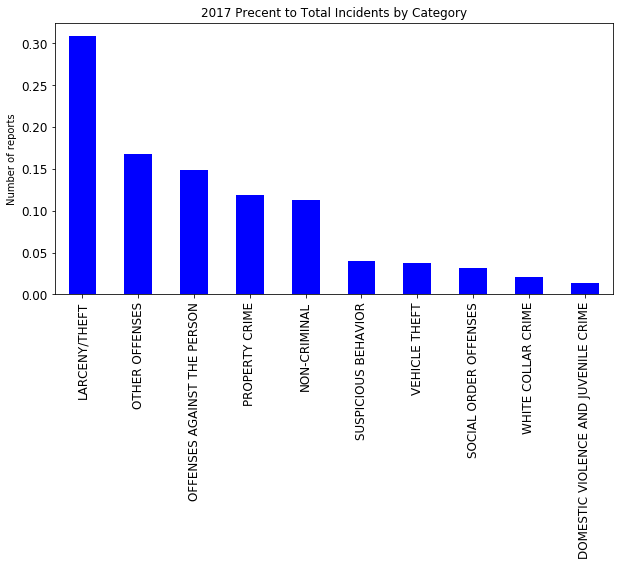

In [157]:
# --- Imports ---
import sys,os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns


incidents= 'police-department-incidents.csv'
incidents = pd.read_csv(incidents)


incidents = incidents.loc[incidents['Year'] == '2017']


sum = incidents['Category'].count()
sum

pre_df.DAYSLATE.value_counts(normalize=True)


def plotdat(incidents,cat):
    l = incidents[cat].value_counts(normalize = True)
    l.sort_values(inplace = True, ascending = False)
    fig=plt.figure(figsize=(10,5))
    plt.yticks(fontsize=8)
    l.plot(kind='bar',fontsize=12,color='b')
    plt.xlabel('')
    plt.ylabel('Number of reports',fontsize=10)
    plt.title('2017 Precent to Total Incidents by Category')

plotdat(incidents, 'Broad_category')







In [439]:

#d_crime=incidents.groupby(['Year', 'Broad_category','Descript'] ).count()


d_crime = incidents.loc[incidents['Year'] == '2017']
d_crime = d_crime.loc[incidents['Broad_category'] == 'OTHER OFFENSES']

d_crime
def types_districts(d_crime,per):
    
    # Group by crime type and district 
    hoods_per_type=d_crime.groupby('Descript').Month.value_counts(sort=True)
    w=hoods_per_type.unstack().fillna(0)
    w
    # Sort by hood sum
    hood_sum=w.sum(axis=0)
    hood_sum.sort_values(ascending=False)
    w=w[hood_sum.index]
    w  
    # Filter by crime per district
    crime_sum=w.sum(axis=1)
    crime_sum.sort_values(ascending=False)
    
    # Large number, so let's slice the data.
    p=np.percentile(crime_sum,per)
    ix=crime_sum[crime_sum>p]
    w=w.loc[ix.index]
    return w
    
w=types_districts(d_crime,90)
w

a  = ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']
b  = ['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
w1 = w.reindex(columns = b)

w1

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Descript,,,,,,,,,,,,
AGGRAVATED ASSAULT WITH A DEADLY WEAPON,95.0,62.0,99.0,89.0,79.0,111.0,126.0,107.0,105.0,107.0,111.0,111.0
AGGRAVATED ASSAULT WITH A KNIFE,31.0,27.0,32.0,35.0,22.0,33.0,33.0,33.0,36.0,30.0,34.0,24.0
AGGRAVATED ASSAULT WITH BODILY FORCE,93.0,56.0,75.0,63.0,79.0,68.0,73.0,90.0,79.0,71.0,50.0,47.0
AIDED CASE,105.0,106.0,126.0,107.0,102.0,108.0,91.0,98.0,76.0,83.0,98.0,82.0
"AIDED CASE, MENTAL DISTURBED",370.0,375.0,417.0,358.0,373.0,385.0,346.0,397.0,380.0,329.0,326.0,339.0
BATTERY,355.0,298.0,400.0,373.0,387.0,369.0,392.0,427.0,358.0,373.0,359.0,348.0
"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",97.0,88.0,97.0,94.0,90.0,84.0,108.0,102.0,108.0,107.0,101.0,104.0
"BURGLARY OF APARTMENT HOUSE, UNLAWFUL ENTRY",47.0,46.0,46.0,46.0,47.0,44.0,34.0,46.0,49.0,58.0,38.0,52.0
"BURGLARY OF RESIDENCE, FORCIBLE ENTRY",33.0,38.0,35.0,27.0,37.0,38.0,24.0,14.0,28.0,40.0,25.0,46.0


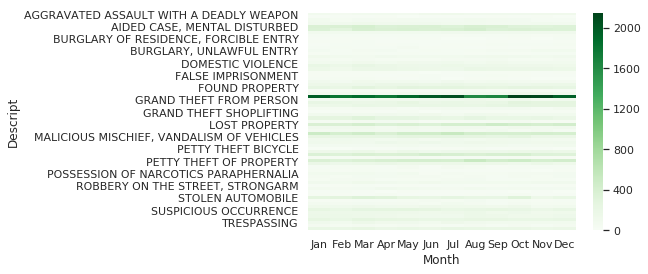

In [440]:
import seaborn as sns; sns.set(color_codes=True)
cmap = "Greens"
plt.figure(figsize=(15,10))

sns.clustermap(w , cmap = cmap) 

In [24]:
from sklearn.linear_model import LinearRegression

dfi  = incidents.groupby(['Year','Week','Broad_category', 'Category', 'Weekday', ]).count() 

dfi_pivot= dfi.pivot_table(values = 'IncidntNum', index = ['Year','Week', 'Category'], columns = 'Weekday', aggfunc=np.sum )

df5.head()

dfi_pivot.to_csv('dfi.csv')
files.download('dfi.csv')


incidents.head()


dfi  = incidents.groupby(['Date','Broad_category', 'Category', 'Weekday', 'Hour']).count() 

dfi_pivot= dfi.pivot_table(values = 'IncidntNum', index = ['Date', 'Category'], columns = 'Weekday', aggfunc=np.sum )

dfi_pivot.to_csv('dfi.csv')
files.download('dfi.csv')


Crime Id  Report Date  ...  Year  Hour
Year Month Original Crime Type Name                         ...            
Apr-2016   'S                             1.0          1.0  ...   1.0   1.0
           ****Poss 221***                1.0          1.0  ...   1.0   1.0
           ***901 Req***                  1.0          1.0  ...   1.0   1.0
           ***909***                      1.0          1.0  ...   1.0   1.0
           **909**                        1.5          1.5  ...   1.5   1.5

[5 rows x 15 columns]

In [26]:
from sklearn.model_selection import train_test_split

pd_districts = {'SOUTHERN':0, 'MISSION':1, 'NORTHERN':2, 'CENTRAL':3, 'BAYVIEW':4, 'INGLESIDE':5, 
                'TENDERLOIN':6, 'TARAVAL':7, 'PARK':8, 'RICHMOND':9}
day_num = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 
                'Sunday':6}


msk = np.random.rand(len(incidents)) < 0.8

train_df = incidents[msk]

test_df = incidents[~msk]

train_df['PdDistrict'].replace(pd_districts, inplace=True)
test_df['PdDistrict'].replace(pd_districts, inplace=True)
train_df['Weekday'].replace(day_num, inplace=True)
test_df['Weekday'].replace(day_num, inplace=True)

columns_to_convert = ['Weekday', 'PdDistrict', 'Hour', 'Month']
train_df[columns_to_convert] = train_df[columns_to_convert].astype('int16')
test_df[columns_to_convert] = test_df[columns_to_convert].astype('int16')

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1770916 entries, 0 to 2215023
Data columns (total 39 columns):
IncidntNum                      int64
Category                        object
Descript                        object
DayOfWeek                       object
Date                            datetime64[ns]
Time                            datetime64[ns]
PdDistrict                      float64
Resolution                      object
Address                         object
X                               float64
Y                               float64
Location                        object
PdId                            int64
SF Find Neighborhoods           float64
Current Police Districts        float64
Current Supervisor Districts    float64
Analysis Neighborhoods          float64
:@computed_region_yftq_j783     float64
:@computed_region_p5aj_wyqh     float64
:@computed_region_rxqg_mtj9     float64
:@computed_region_bh8s_q3mv     float64
:@computed_region_fyvs_ahh9     float64
:@c

In [0]:


callsJuly = calls.loc[calls['Year Month'] == '18-Jul']

# stacked Bar for Calls by Month


df5  = calls.groupby(['Year Month','Original Crime Type Name', 'Call Date', 'Weekday']).count() 

df5 = df5.groupby(['Year Month', 'Original Crime Type Name', 'Weekday']).mean()
#df5
df5.reset_index(inplace=True)   

df5.head()

df51 = df5.pivot_table(values = 'Crime Id', index = ['Year Month', 'Original Crime Type Name' ], columns = 'Weekday', aggfunc=np.sum )
 

df51.to_csv('df.csv')
files.download('df.csv')  
  
  
  
  
  
df5  = calls.groupby(['Call Date', 'Weekday']).count() 
df5.index.values
#df5 = df5.groupby(['Year Month', 'Original Crime Type Name']).mean()
df5
df5.reset_index(inplace=True)   

df5

df51 = df5.pivot_table(values = 'Crime Id', index = ['Call Date', 'Weekday' ], aggfunc=np.sum )
 

df51.to_csv('df.csv')
files.download('df.csv')  
   
  
  
  
  
  

fig, ax = plt.subplots(figsize=(40,10))  

Days = df5['Weekday'].drop_duplicates()
margin_bottom = np.zeros(len(df5['Year Month'].drop_duplicates()))
margin_bottom
colors = ["#006D2C", "#31A354","#74C476","#74C476","#74C476","#74C476","#74C476"]

for num, day in enumerate(Days):
    values = list(df5[df5['Weekday'] == day].loc[:, 'Crime Id'])
    #print (day)
    #print(values)
    df5[df5['Weekday'] == day].plot.bar(x='Year Month',y='Crime Id', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=day)
    margin_bottom += values

plt.show()






























df51.to_csv('df.csv')
files.download('df.csv')



























 
fig = Category_crimes_2016_df["Percentage"].plot(kind="bar", figsize = (20,10), rot=75) 

fig.set_title("Frequency of Crimes by Category - 2016", fontsize=15, weight = "bold")
fig.set_ylabel("Percentage of Crimes", fontsize=12)
plt.savefig('../plot/04.perc_crime_category_2016.png')
plt.show()


plt.show()

df5  = calls.groupby(['Weekday', 'Hour']).count() 
df5.index.values

df5
df5.describe()

df7  = callsJuly.groupby(['Weekday', 'Hour']).count()
df7

df_gb2 = df5



df_h2 = df_gb2.pivot( "Weekday","Hour" , "Crime Id")
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
ax = sns.heatmap(df_h2, ax=ax, cmap= sns.cm.rocket_r, color = 'Blue')
plt.title('Heat Map : Crime by District and Hour of day - 2017', fontsize=20, weight='bold')

plt.show()

df_gb3 = df7

df_gb3.reset_index(inplace=True)

df_h2 = df_gb3.pivot( "Weekday","Hour" , "Crime Id")
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
ax = sns.heatmap(df_h2, ax=ax, cmap= sns.cm.rocket_r, color = 'Blue')
plt.title('Heat Map : Crime by District and Hour of day - 2017', fontsize=20, weight='bold')

plt.show()

df8 = incidents.loc[incidents['Year'] == '2017']

x, y = df8.shape 
print(x)

df8  = df8.groupby(['Year Month','Broad_category', 'Category', 'Weekday', 'Hour']).count() 
df_gb4 = df8

df8.describe()
df_h2 = df_gb4.pivot_table(values = 'IncidntNum', index = ['Category','Hour'], columns = 'Weekday', aggfunc=np.sum )

df_h2.to_csv('df8.csv')
files.download('df8.csv')


fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
ax = sns.heatmap(df_h2, ax=ax, cmap= sns.cm.rocket_r, color = 'Blue')
plt.title('Heat Map : Crime by District and Hour of day - 2017', fontsize=20, weight='bold')

plt.show()


incidents.head()
df8

incidents.head()
df8
df8  = incidents.groupby(['Year Month','Date', 'Weekday']).count() 
df8
df8 = df8.groupby(['Year Month', 'Weekday']).mean()
df8.reset_index(level=0, inplace=True)
df8.reset_index(level=0, inplace=True)
df8

#df_h2 = df_gb4.pivot_table(values = 'IncidntNum', index = ['Year Month'], columns = 'Weekday', aggfunc=np.sum )
 
df8.index 

fig, ax = plt.subplots(figsize=(60,20))  

Days = df12.index.levels[1]
margin_bottom = np.zeros(len(df8['Year Month'].drop_duplicates()))
margin_bottom
colors = ["#006D2C", "#31A354","#74C476","#74C476","#74C476","#74C476","#74C476"]

for num, day in enumerate(Days):
    values = list(df8[df8['Weekday'] == day].loc[:, 'IncidntNum'])
    #print (day)
    #print(values)
    df8[df8['Weekday'] == day].plot.bar(x='Year Month',y='IncidntNum', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=day)
    margin_bottom += values

plt.show()

df8.index.get_level_values('Weekday')

df8.reset_index(level=0, inplace=True)
df8

df81.to_csv('df.csv')
files.download('df.csv')

df8.columns
joined.head()


df9  = joined.groupby(['Year Month','Call Date', 'Weekday']).count() 
df9.index.values
df9 = df9.groupby(['Year Month', 'Weekday']).mean()
df9
df9.reset_index(inplace=True)
df91 = df9.pivot( 'Year Month', 'Weekday' , "IncidntNum")
df91.to_csv('df.csv')
files.download('df.csv')


df10 = calls.groupby(['Call Date']).count()
mindate = min(calls['Call Date'])
mindate 
maxdate = max(calls['Call Date'])
maxdate

totalrange = maxdate - mindate

df10

totalrange.days


df10 = incidents.groupby(['Date']).count()
mindate = min(incidents['Date'])
mindate 
maxdate = max(incidents['Date'])
maxdate

totalrange = maxdate - mindate

df10

totalrange.days






df5.index[0][0]

df5 = df5.sort_values(['Year Month', 'Weekday'], ascending = False)
crime_count = df5['Crime Id'].values
mids = df5['Crime Id'].index.values
x = range(0,len(mids)-1, 500)

plt.xticks(x, mids)
plt.xticks(rotation = 90)
plt.xlabel('movieId (Intervals of 500)')
plt.ylabel('Count of Ratings')
plt.title('Ratings by movidId')
plt.plot(crime_count)

df5
df5.unstack()
df5 = df5['Weekday1']['Crime Id']

Monday = []

df6 = df5.index.values
df6

for x in df6:
   if x[][1] == 'Monday':
      Monday.append(y)

Monday
Monday = [Monday.append(df5['Crime Id']) if x == 'Monday' for x in df5['Weekday']]


Tuesday[]
Wednesday[]
Thursday[]
Friday[]
Saturday[]
Sunday[]


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [12, 28, 1, 8, 22]
bars2 = [28, 7, 16, 4, 10]
bars3 = [25, 3, 23, 25, 17]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()
